In [45]:
import osmnx as ox
import networkx as nx
import pandas as pd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point

import os
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import GOSTnets as gn
import numpy as np
import seaborn as sns

In [283]:
files = os.listdir("simbig21data/")
files = [f for f in files if 'csv' in f]
files

['santa_maria_del_mar.csv',
 'independencia.csv',
 'la_victoria.csv',
 'miraflores.csv',
 'san_martin_de_porres.csv',
 'el_agustino.csv',
 'san_bartolo.csv',
 'ancon.csv',
 'pachacamac.csv',
 'rimac.csv',
 'ate.csv',
 'pueblo_libre.csv',
 'carabayllo.csv',
 'puente_piedra.csv',
 'jesus_maria.csv',
 'lurigancho.csv',
 'la_perla.csv',
 'chorrillos.csv',
 'san_borja.csv',
 'lima.csv',
 'bellavista.csv',
 'chaclacayo.csv',
 'breña.csv',
 'barranco.csv',
 'surquillo.csv',
 'cieneguilla.csv',
 'villa_maria_del_triunfo.csv',
 'la_punta.csv',
 'carmen_de_la_legua_reynoso.csv',
 'santa_rosa.csv',
 'callao.csv',
 'lurin.csv',
 'comas.csv',
 'san_luis.csv',
 'san_juan_de_miraflores.csv',
 'los_olivos.csv',
 'san_miguel.csv',
 'lince.csv',
 'ventanilla.csv',
 'villa_el_salvador.csv',
 'santiago_de_surco.csv',
 'punta_hermosa.csv',
 'pucusana.csv',
 'santa_anita.csv',
 'la_molina.csv',
 'mi_peru.csv',
 'punta_negra.csv',
 'san_isidro.csv',
 'magdalena_del_mar.csv',
 'san_juan_de_lurigancho.csv']

In [284]:
data = pd.DataFrame()
for file in files:
    tmp = pd.read_csv("simbig21data/{}".format(file), dtype=object)
    tmp['file'] = file
    data = pd.concat([data, tmp])

data = data.astype({
    'bank_dist':np.float64,
    'courthouse_dist': np.float64,
    'hospital_dist': np.float64,
    'marketplace_dist': np.float64,
    'police_dist': np.float64,
    'school_dist': np.float64,
    'university_dist': np.float64
})

data['district'] = data.apply(lambda x: x['file'].replace('.csv', ''), axis=1)
data.head()

,osmid,y,x,street_count,ref,highway,geometry,bank_amenity,bank_node,bank_dist,courthouse_amenity,courthouse_node,courthouse_dist,hospital_amenity,hospital_node,hospital_dist,marketplace_amenity,marketplace_node,marketplace_dist,police_amenity,police_node,police_dist,school_amenity,school_node,school_dist,university_amenity,university_node,university_dist,file,district
0,495332969,-12.3940948,-76.7634722,3,NaN,NaN,POINT (-76.7634722 -12.3940948),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1697.356,5593356777,6488581646,1434.011,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
1,495332981,-12.3937417,-76.7638089,3,L,motorway_junction,POINT (-76.7638089 -12.3937417),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1714.425,5593356777,6488581646,1451.080,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
2,495333489,-12.3952838,-76.7647711,3,NaN,NaN,POINT (-76.7647711 -12.3952838),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1496.988,5593356777,6488581646,1233.643,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
3,495333528,-12.3948576,-76.7643121,3,NaN,NaN,POINT (-76.7643121 -12.3948576),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1565.769,5593356777,6488581646,1302.424,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
4,495335651,-12.4054307,-76.774205,3,NaN,NaN,POINT (-76.77420499999999 -12.4054307),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,684.100,5593356777,6488581646,943.806,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar


In [285]:
columns = ['district','osmid', 
#            'geometry', 
           'bank_dist', 'courthouse_dist', 'hospital_dist', 
           'marketplace_dist', 'police_dist', 'school_dist', 'university_dist']

columns2 = ['osmid', 
#            'geometry', 
           'bank_dist', 'courthouse_dist', 'hospital_dist', 
           'marketplace_dist', 'police_dist', 'school_dist', 'university_dist']


columns_dist = [
           'bank_dist', 'courthouse_dist', 'hospital_dist', 
           'marketplace_dist', 'police_dist', 'school_dist', 'university_dist']
data[columns].head()

,district,osmid,bank_dist,courthouse_dist,hospital_dist,marketplace_dist,police_dist,school_dist,university_dist
0,santa_maria_del_mar,495332969,NaN,NaN,NaN,NaN,1697.356,1434.011,NaN
1,santa_maria_del_mar,495332981,NaN,NaN,NaN,NaN,1714.425,1451.080,NaN
2,santa_maria_del_mar,495333489,NaN,NaN,NaN,NaN,1496.988,1233.643,NaN
3,santa_maria_del_mar,495333528,NaN,NaN,NaN,NaN,1565.769,1302.424,NaN
4,santa_maria_del_mar,495335651,NaN,NaN,NaN,NaN,684.100,943.806,NaN


In [281]:
data[columns].mean()

osmid                       inf
bank_dist           2591.876967
courthouse_dist     5209.240317
hospital_dist       4270.190406
marketplace_dist    1369.694333
police_dist         2175.747026
school_dist          618.933334
university_dist     4127.304018
dtype: float64

In [287]:
tmp = data[columns].groupby('district').mean()/1000
tmp
tmp.to_csv("MatrixDistance.csv")

In [288]:
data[columns2].set_index('osmid')/1000

,bank_dist,courthouse_dist,hospital_dist,marketplace_dist,police_dist,school_dist,university_dist
osmid,,,,,,,
495332969,NaN,NaN,NaN,NaN,1.697356,1.434011,NaN
495332981,NaN,NaN,NaN,NaN,1.714425,1.451080,NaN
495333489,NaN,NaN,NaN,NaN,1.496988,1.233643,NaN
495333528,NaN,NaN,NaN,NaN,1.565769,1.302424,NaN
495335651,NaN,NaN,NaN,NaN,0.684100,0.943806,NaN
...,...,...,...,...,...,...,...
8973481161,2.233449,4.781637,5.040856,0.852827,1.618776,0.455336,2.954199
8982463159,1.311346,6.414769,2.647691,0.924944,0.715788,0.228789,1.788380
8982463160,1.314536,6.412565,2.645487,0.928134,0.718978,0.276365,1.752404


In [140]:
data.groupby('district')[['osmid']].count().sort_values('osmid', ascending=False)

,osmid
district,
san_juan_de_lurigancho,12443
carabayllo,9163
ate,8147
san_martin_de_porres,7272
villa_el_salvador,6471
villa_maria_del_triunfo,6280
puente_piedra,6069
comas,5662
san_juan_de_miraflores,4394


In [121]:
cond = data['district'] == 'santa_maria_del_mar'
tmp = data[cond]
tmp.head()

,osmid,y,x,street_count,ref,highway,geometry,bank_amenity,bank_node,bank_dist,courthouse_amenity,courthouse_node,courthouse_dist,hospital_amenity,hospital_node,hospital_dist,marketplace_amenity,marketplace_node,marketplace_dist,police_amenity,police_node,police_dist,school_amenity,school_node,school_dist,university_amenity,university_node,university_dist,file,district
0,495332969,-12.3940948,-76.7634722,3,NaN,NaN,POINT (-76.7634722 -12.3940948),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1697.356,5593356777,6488581646,1434.011,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
1,495332981,-12.3937417,-76.7638089,3,L,motorway_junction,POINT (-76.7638089 -12.3937417),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1714.425,5593356777,6488581646,1451.080,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
2,495333489,-12.3952838,-76.7647711,3,NaN,NaN,POINT (-76.7647711 -12.3952838),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1496.988,5593356777,6488581646,1233.643,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
3,495333528,-12.3948576,-76.7643121,3,NaN,NaN,POINT (-76.7643121 -12.3948576),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,1565.769,5593356777,6488581646,1302.424,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar
4,495335651,-12.4054307,-76.774205,3,NaN,NaN,POINT (-76.77420499999999 -12.4054307),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4281349671,495335838,684.100,5593356777,6488581646,943.806,NaN,NaN,NaN,santa_maria_del_mar.csv,santa_maria_del_mar


In [338]:
def plotDistances(data, district, ax, legend=True):
    
    cond = data['district'] == district
    tmp = data[cond]
#     tmp.head()
    
#     fig, ax = plt.subplots(figsize=(7,5))

    columns = ['osmid', 
               'bank_dist', 'courthouse_dist', 'hospital_dist', 
               'marketplace_dist', 'police_dist', 'school_dist', 'university_dist']

    toPlot = tmp[columns].set_index('osmid')/1000
    colors = ['green', 'red', 'purple', 'black', 'orange', 'cyan', 'blue']
    colors_dist = {
        'bank_dist':'orange',
        'courthouse_dist': 'pink',
        'hospital_dist': 'red',
        'marketplace_dist': 'purple',
        'police_dist': 'green',
        'school_dist': 'blue',
        'university_dist': 'black'
    }

    i=0
    for col in columns[1:]:
        cond = toPlot[col] > 0
        label = col.capitalize().replace('_dist','')
        ax = sns.kdeplot(data=toPlot[cond], x=col, ax=ax, cumulative=True, 
                          label=label, alpha=0.5,
#                         color=colors[i]
                         color = colors_dist[col]
                        )
        i=i+1

#     ax.set_xlabel("Distance (Km)", size=15)
#     ax.set_ylabel("Nodes", size=15)

    ax.set_xlabel(None)
    ax.set_ylabel(None)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

    if legend: 
        ax.legend(fontsize=12)
        
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_title(district.replace('_',' ').upper())
#     plt.show()
#     return fig, ax

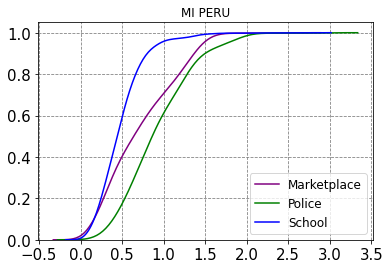

In [348]:
fig, ax = plt.subplots()
plotDistances(data, 'mi_peru', ax)

In [291]:
list_districts = data['district'].unique()
list_districts
# plotDistances(data, 'san luis')

list_districts = data.groupby('district')[['osmid']].count().sort_values('osmid', ascending=False).index
list_districts

Index(['san_juan_de_lurigancho', 'carabayllo', 'ate', 'ventanilla',
       'san_martin_de_porres', 'villa_el_salvador', 'villa_maria_del_triunfo',
       'puente_piedra', 'comas', 'callao', 'san_juan_de_miraflores',
       'lurigancho', 'santiago_de_surco', 'chorrillos', 'pachacamac',
       'los_olivos', 'lurin', 'la_molina', 'ancon', 'lima', 'independencia',
       'cieneguilla', 'el_agustino', 'santa_rosa', 'la_victoria',
       'santa_anita', 'san_borja', 'san_miguel', 'miraflores', 'san_isidro',
       'rimac', 'punta_hermosa', 'mi_peru', 'pueblo_libre', 'surquillo',
       'chaclacayo', 'bellavista', 'la_perla', 'san_luis', 'punta_negra',
       'jesus_maria', 'breña', 'pucusana', 'san_bartolo',
       'carmen_de_la_legua_reynoso', 'magdalena_del_mar', 'lince', 'barranco',
       'santa_maria_del_mar', 'la_punta'],
      dtype='object', name='district')

In [292]:
# np.sort(list_districts)
len(list_districts)

50

CPU times: user 48.2 s, sys: 20.5 s, total: 1min 8s
Wall time: 36.8 s


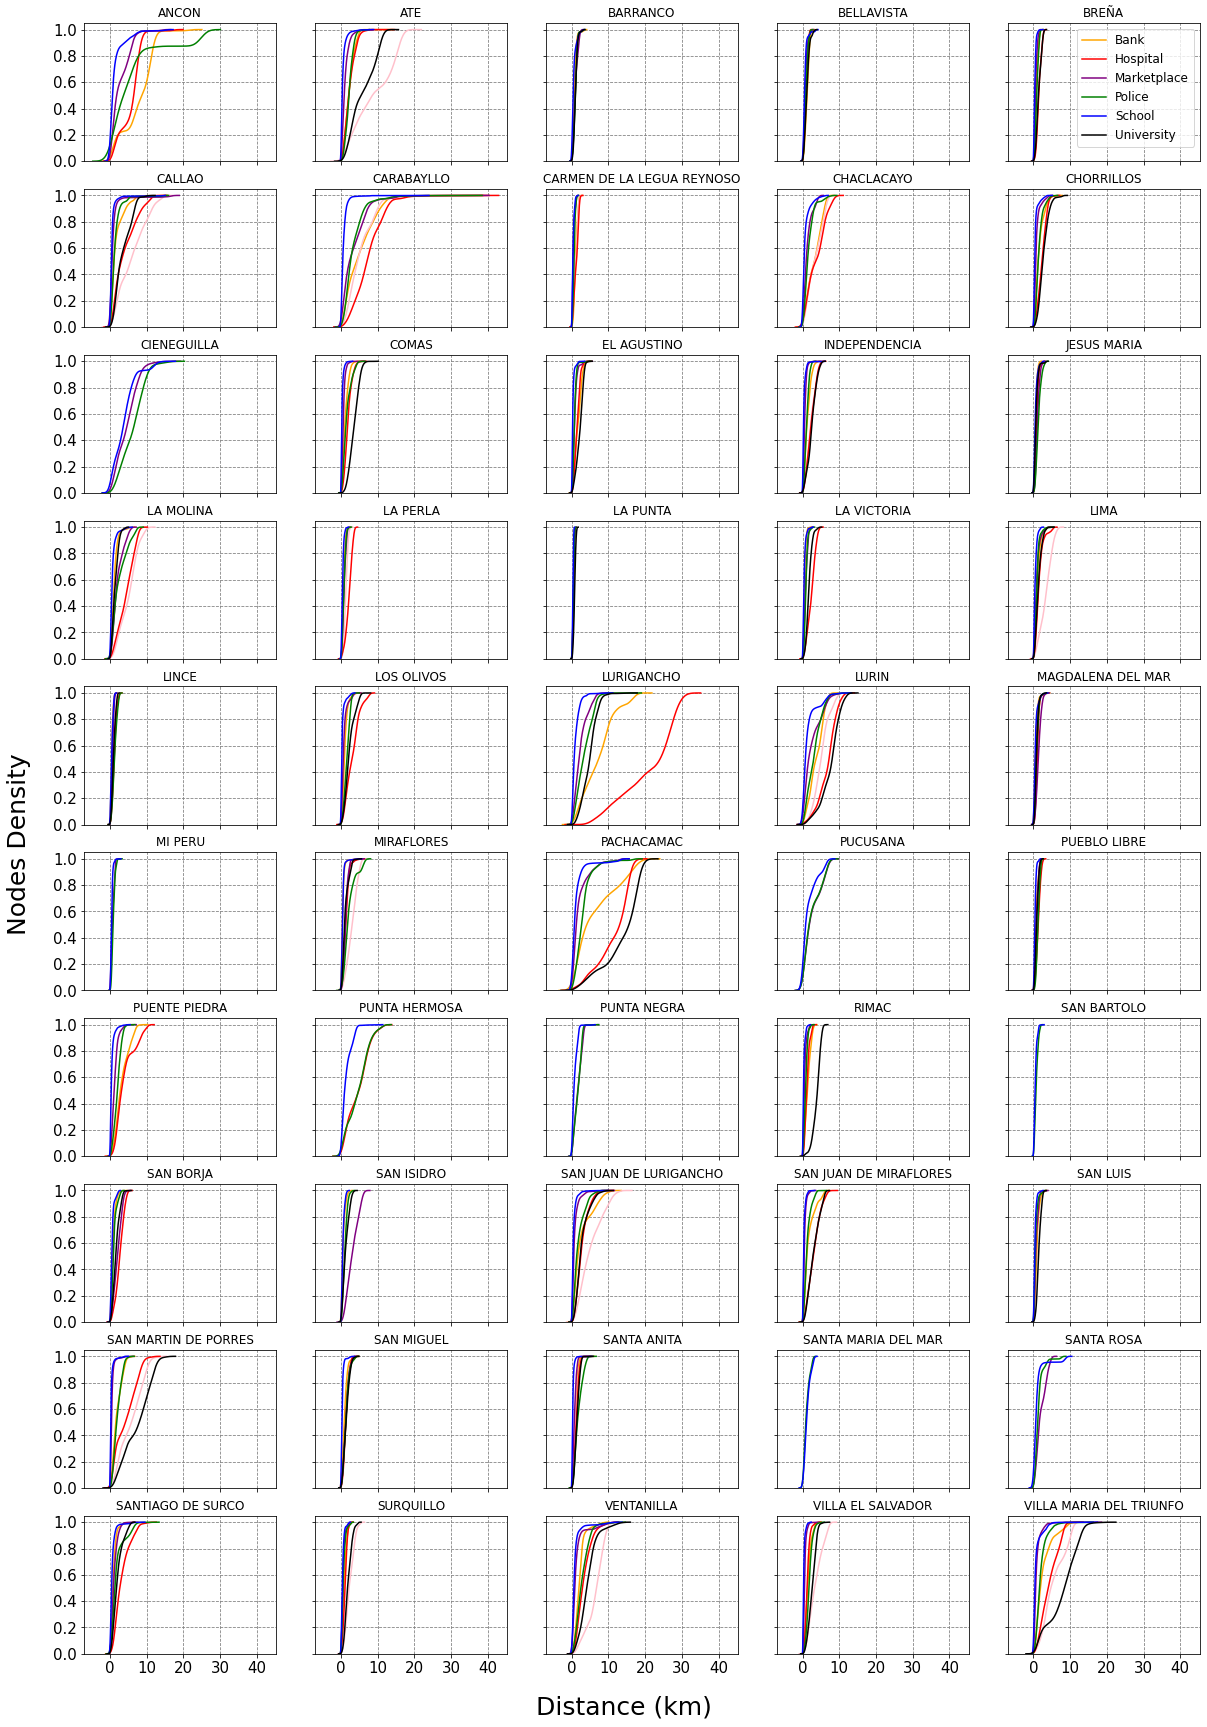

In [342]:
%%time

N,M = 10,5

fig, ax = plt.subplots(N, M, sharex=True, sharey=True, figsize=(20,30))


list_districts = data.groupby('district')[['osmid']].count().sort_values('osmid', ascending=False).index

_list = np.sort(list_districts[:N*M])
matrix = np.array(_list).reshape(N,M)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        val = matrix[i][j]
        if (i==0) & (j==4):
            plotDistances(data, val, ax[i][j])
        else:
            plotDistances(data, val, ax[i][j], False)

# Set common labels
fig.text(0.5, 0.1, 'Distance (km)', ha='center', va='center', fontsize=25)
fig.text(0.08, 0.5, 'Nodes Density', ha='center', va='center', rotation='vertical', fontsize=25)

plt.savefig("distances_dpi600.png", bbox_inches='tight', dpi=600)

/bin/bash: conda: command not found


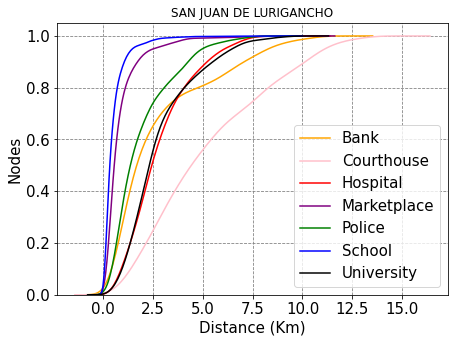

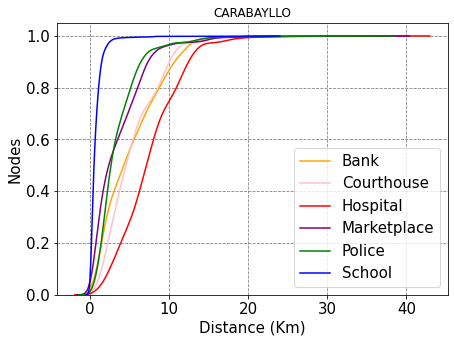

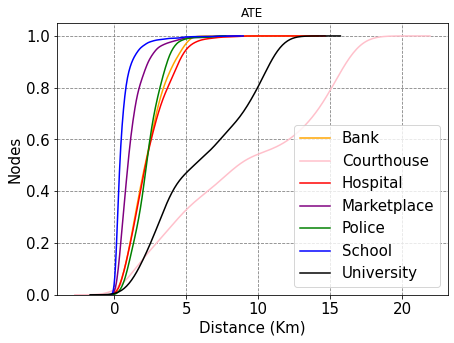

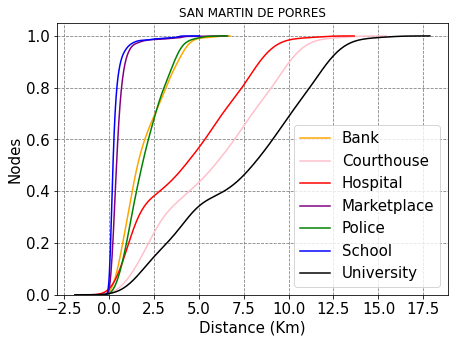

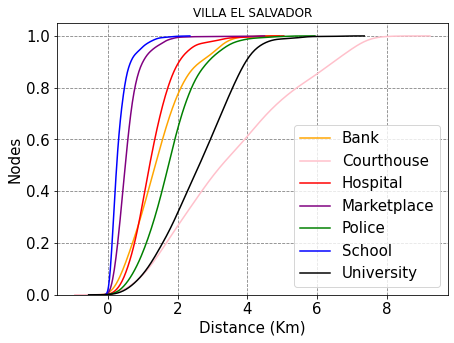

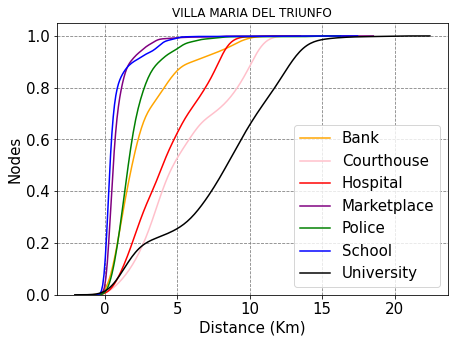

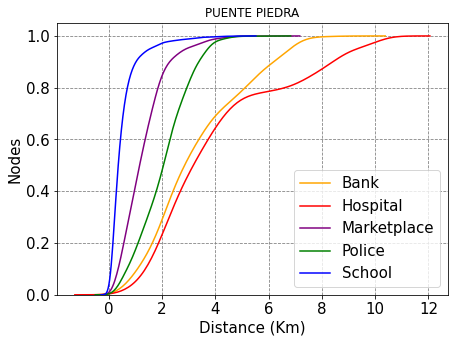

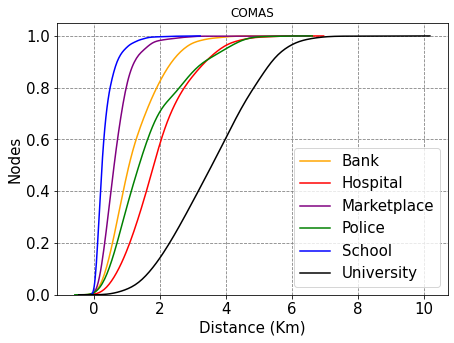

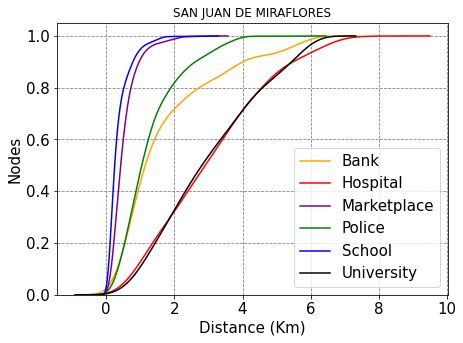

In [219]:

for i, d in enumerate(list_districts[:9]) :
#     print(i,d)
    fig, ax = plt.subplots(figsize=(7,5))
    plotDistances(data, d, ax)